In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/meteo_2021.csv')
df.head()

,nb,date,temp,wind,rain,Day of Week,Month
0,8255,2021-04-09,10.68,4.25,0.11,Friday,4
1,16889,2021-04-10,10.12,3.52,0.00,Saturday,4
2,13475,2021-04-11,9.83,4.33,0.92,Sunday,4
3,9508,2021-04-12,7.28,4.47,0.27,Monday,4
4,13433,2021-04-13,6.45,2.21,0.01,Tuesday,4


In [3]:
X = df.iloc[:, [2, 3, 4, 6]].values
y = df.iloc[:, 0].values
X,Xtest,y,ytest = train_test_split(X,y,train_size=.8)

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
def choix_profondeur(X,y):
    l = list()
    for n in range(8):
        ab = DecisionTreeRegressor(max_depth=1+n)
        ab.fit(X,y)
        l.append(ab.score(X,y))
    return l
            

In [6]:
choix_profondeur(X,y)

[0.5458801779693201,
 0.6705922980725857,
 0.7230381019086707,
 0.7846160793061527,
 0.8281871773179487,
 0.8782327951159962,
 0.9223218288237924,
 0.960216044354881]

In [7]:
ab1 = DecisionTreeRegressor(max_depth=3)
ab1.fit(X,y)

DecisionTreeRegressor(max_depth=3)

In [8]:
ab1.score(X,y)

0.7230381019086707

In [9]:
variables = ["temp","wind","rain","month"]

In [10]:
from sklearn import tree

In [11]:
text_representation = tree.export_text(ab1,feature_names=variables)
print(text_representation)

|--- temp <= 11.55
|   |--- month <= 4.50
|   |   |--- temp <= 6.05
|   |   |   |--- value: [5780.33]
|   |   |--- temp >  6.05
|   |   |   |--- value: [11620.25]
|   |--- month >  4.50
|   |   |--- temp <= 11.25
|   |   |   |--- value: [18901.42]
|   |   |--- temp >  11.25
|   |   |   |--- value: [12048.00]
|--- temp >  11.55
|   |--- month <= 5.50
|   |   |--- wind <= 3.87
|   |   |   |--- value: [23855.20]
|   |   |--- wind >  3.87
|   |   |   |--- value: [21238.20]
|   |--- month >  5.50
|   |   |--- rain <= 0.15
|   |   |   |--- value: [30136.62]
|   |   |--- rain >  0.15
|   |   |   |--- value: [25906.16]



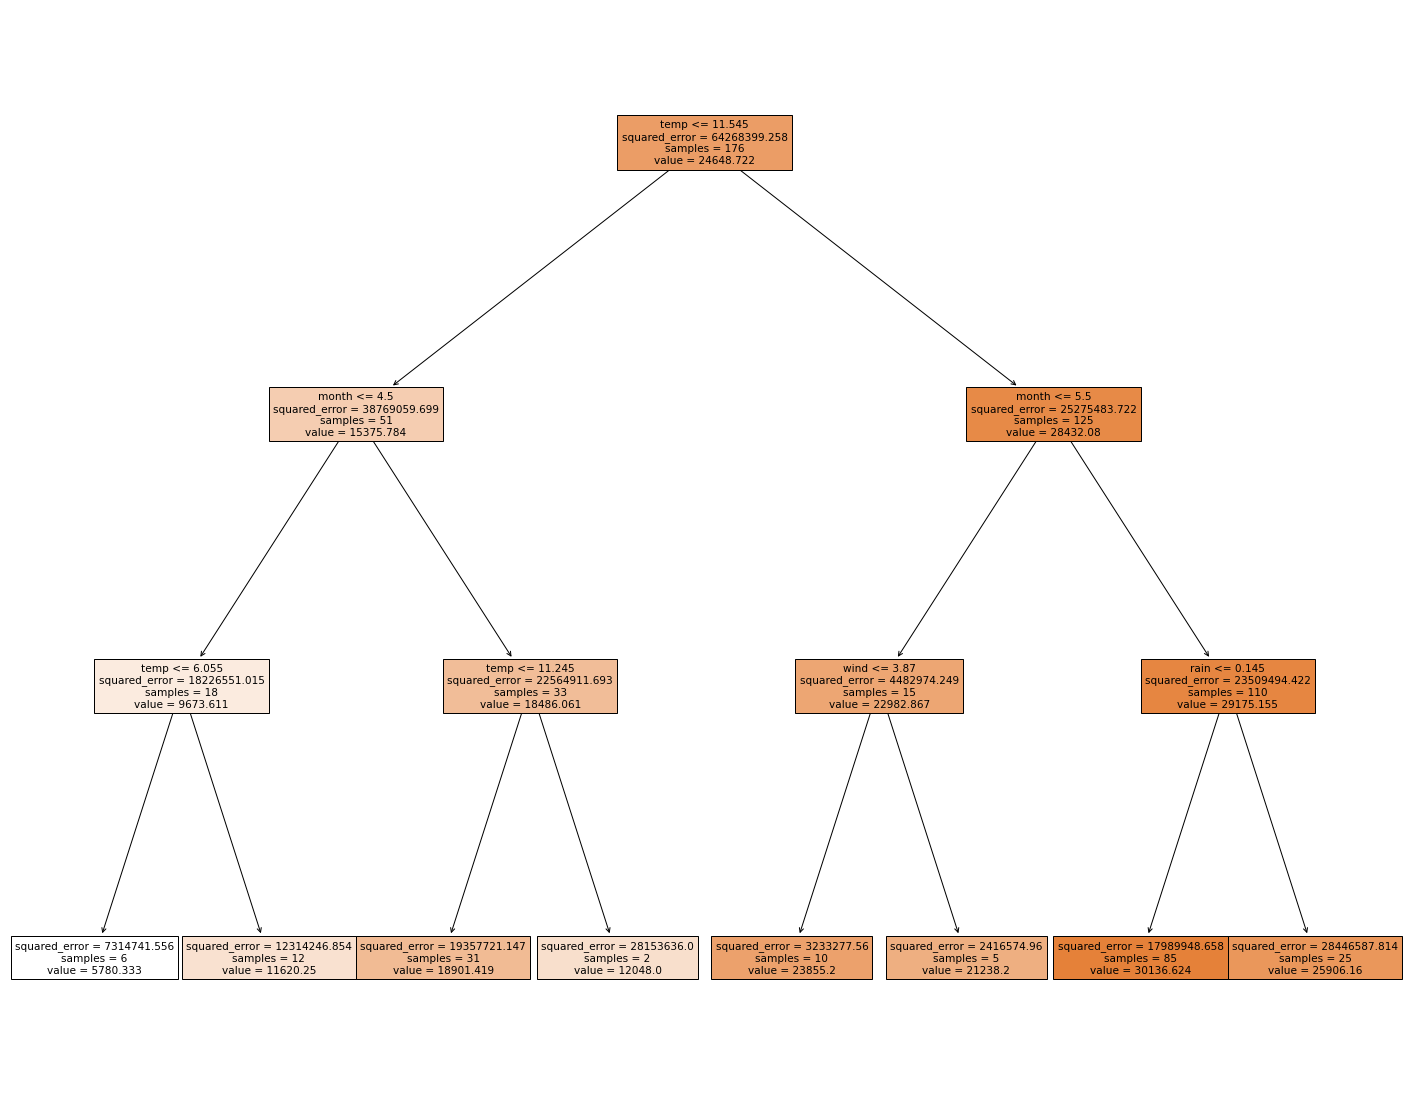

In [12]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(ab1, feature_names=variables,filled=True)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


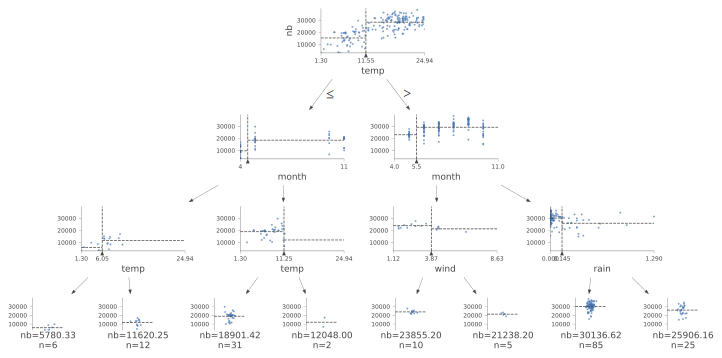

In [13]:
from dtreeviz.trees import dtreeviz 

viz = dtreeviz(ab1, X, y,
                target_name="nb",
                feature_names=variables)
viz

In [14]:
ab1.score(Xtest,ytest)

0.5936182767979643

Bien meilleure qu'une régression linéaire